# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar



Using TensorFlow backend.


In [2]:
RUN_ID = '0019'
RUN_FOLDER = os.path.join("./run", RUN_ID)

IMAGE_SIZE = 32

## data

In [3]:
label = 1
(x_train, y_train) = load_cifar(label, 10)
# (x_train, y_train) = load_safari('elephant')




## architecture

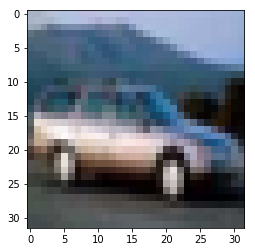

In [4]:
plt.imshow((x_train[0,:,:,:]+1)/2)

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(6000, 32, 32, 3)

In [7]:
#works

gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [32,64,128,256]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.8
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (4,4,256)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [128,64,32,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )





# gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
#         , critic_conv_filters = [32,64,128,128]
#         , critic_conv_kernel_size = [5,5,5,5]
#         , critic_conv_strides = [2,2,2,1]
#         , critic_conv_padding = 'same'
#         , critic_batch_norm_momentum = None
#         , critic_activation = 'leaky_relu'
#         , critic_dropout_rate = None
#         , critic_learning_rate = 0.00005
#         , generator_initial_dense_layer_size = (4, 4, 128)
#         , generator_upsample = [2,2, 2,1]
#         , generator_conv_filters = [128,64,32,3]
#         , generator_conv_kernel_size = [5,5,5,5]
#         , generator_conv_strides = [1,1, 1,1]
#         , generator_conv_padding = 'same'
#         , generator_batch_norm_momentum = 0.8
#         , generator_activation = 'leaky_relu'
#         , generator_dropout_rate = None
#         , generator_learning_rate = 0.00005
#         , optimiser = 'rmsprop'
#         , z_dim = 100
#         )

gan.save(RUN_FOLDER)


In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_4 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 128)         819328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 128)         512       
__________

## training

In [ ]:
gan.train(     
    x_train
    , batch_size = 32
    , epochs = 100000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 10
    , large_it_critic = 10
    , large_n_critic = 5
    , clip_threshold = 0.01
    , using_generator = False
)

1953 (10, 1) [D loss: (0.001)(R -0.151, F 0.154)]  [G loss: -0.145] 
1954 (10, 1) [D loss: (0.001)(R -0.143, F 0.144)]  [G loss: -0.139] 
1955 (10, 1) [D loss: (0.001)(R -0.140, F 0.142)]  [G loss: -0.135] 
1956 (10, 1) [D loss: (-0.001)(R -0.136, F 0.134)]  [G loss: -0.137] 
1957 (10, 1) [D loss: (-0.005)(R -0.138, F 0.127)]  [G loss: -0.125] 
1958 (10, 1) [D loss: (-0.003)(R -0.133, F 0.127)]  [G loss: -0.127] 
1959 (10, 1) [D loss: (0.001)(R -0.136, F 0.137)]  [G loss: -0.130] 
1960 (10, 1) [D loss: (0.004)(R -0.136, F 0.145)]  [G loss: -0.137] 
1961 (10, 1) [D loss: (0.000)(R -0.143, F 0.143)]  [G loss: -0.138] 
1962 (10, 1) [D loss: (0.001)(R -0.144, F 0.145)]  [G loss: -0.135] 
1963 (10, 1) [D loss: (0.001)(R -0.144, F 0.147)]  [G loss: -0.143] 
1964 (10, 1) [D loss: (-0.004)(R -0.148, F 0.139)]  [G loss: -0.145] 
1965 (10, 1) [D loss: (0.000)(R -0.148, F 0.148)]  [G loss: -0.144] 
1966 (10, 1) [D loss: (0.005)(R -0.142, F 0.152)]  [G loss: -0.146] 
1967 (10, 1) [D loss: (0.002)(

2071 (10, 1) [D loss: (-0.002)(R -0.073, F 0.069)]  [G loss: -0.063] 
2072 (10, 1) [D loss: (-0.005)(R -0.083, F 0.072)]  [G loss: -0.066] 
2073 (10, 1) [D loss: (-0.008)(R -0.073, F 0.058)]  [G loss: -0.065] 
2074 (10, 1) [D loss: (-0.002)(R -0.072, F 0.068)]  [G loss: -0.065] 
2075 (10, 1) [D loss: (-0.002)(R -0.074, F 0.069)]  [G loss: -0.068] 
2076 (10, 1) [D loss: (-0.004)(R -0.076, F 0.068)]  [G loss: -0.066] 
2077 (10, 1) [D loss: (-0.006)(R -0.071, F 0.060)]  [G loss: -0.061] 
2078 (10, 1) [D loss: (-0.004)(R -0.075, F 0.066)]  [G loss: -0.061] 
2079 (10, 1) [D loss: (-0.005)(R -0.073, F 0.062)]  [G loss: -0.056] 
2080 (10, 1) [D loss: (-0.008)(R -0.075, F 0.059)]  [G loss: -0.058] 
2081 (10, 1) [D loss: (-0.004)(R -0.073, F 0.065)]  [G loss: -0.057] 
2082 (10, 1) [D loss: (-0.001)(R -0.062, F 0.059)]  [G loss: -0.054] 
2083 (10, 1) [D loss: (0.001)(R -0.058, F 0.060)]  [G loss: -0.058] 
2084 (10, 1) [D loss: (-0.003)(R -0.070, F 0.063)]  [G loss: -0.057] 
2085 (10, 1) [D loss:

In [30]:
BATCH_SIZE = 32

check = True
while check :
    
    for _ in range(5):

        valid = np.ones((BATCH_SIZE,1))
        fake = -np.ones((BATCH_SIZE,1))

        idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
        true_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
        gen_imgs = gan.generator.predict(noise)

        d_loss_real =   gan.critic.train_on_batch(true_imgs, valid)
        d_loss_fake =   gan.critic.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        
        for l in gan.critic.layers:
            weights = l.get_weights()
            weights = [np.clip(w, -0.01, 0.01) for w in weights]
            l.set_weights(weights)
            

    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)]" % (d_loss, d_loss_real, d_loss_fake))  
    

[D loss: (-0.018)(R -0.008, F -0.028)]
[D loss: (-0.026)(R -0.022, F -0.031)]
[D loss: (-0.022)(R -0.014, F -0.031)]
[D loss: (-0.024)(R -0.010, F -0.038)]
[D loss: (-0.011)(R 0.006, F -0.027)]
[D loss: (-0.032)(R -0.016, F -0.048)]
[D loss: (-0.021)(R 0.001, F -0.043)]
[D loss: (-0.034)(R -0.011, F -0.057)]
[D loss: (-0.012)(R 0.004, F -0.028)]
[D loss: (-0.032)(R -0.011, F -0.053)]
[D loss: (-0.030)(R -0.004, F -0.057)]
[D loss: (-0.022)(R 0.001, F -0.046)]
[D loss: (-0.027)(R -0.012, F -0.043)]
[D loss: (-0.027)(R 0.001, F -0.055)]
[D loss: (-0.026)(R 0.006, F -0.057)]
[D loss: (-0.038)(R -0.021, F -0.054)]
[D loss: (-0.045)(R -0.032, F -0.059)]
[D loss: (-0.033)(R -0.015, F -0.051)]
[D loss: (-0.038)(R -0.019, F -0.056)]
[D loss: (-0.043)(R -0.020, F -0.066)]
[D loss: (-0.031)(R -0.008, F -0.055)]
[D loss: (-0.032)(R -0.009, F -0.055)]
[D loss: (-0.039)(R -0.016, F -0.063)]
[D loss: (-0.030)(R -0.020, F -0.039)]
[D loss: (-0.040)(R -0.016, F -0.065)]
[D loss: (-0.025)(R -0.006, F -

KeyboardInterrupt: 

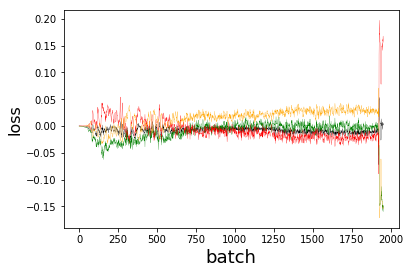

In [34]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [ ]:
gan.critic.get_weights()

In [ ]:
for l in self.critic.layers:
        
    weights = l.get_weights()
    if 'batch_normalization' in l.get_config()['name']:
        weights = [np.clip(w, -0.01, 0.01) for w in weights[:2]] + weights[2:]
    else:
        weights = [np.clip(w, -0.01, 0.01) for w in weights]

    l.set_weights(weights)

In [ ]:
for l in gan.critic.layers:
    print(l.get_config()['name'])
    if 'batch_normalization' in l.get_config()['name']:
        weights = l.get_weights()
        print(l.get_weights()[0])
        print(l.get_weights()[1])
        print(l.get_weights()[2])
        print(l.get_weights()[3])
#         weights = [np.clip(w, -0.01, 0.01) for w in weights[:2]] + weights[2:]
#         l.set_weights(weights)
#         print('-----')
#         print(l.get_weights()[0])
#         print(l.get_weights()[1])
#         print(l.get_weights()[2])
#         print(l.get_weights()[3])